In [1]:
import numpy as np
import cv2
import os
# Added because of this error
# Error #15: Initializing libiomp5.dylib, but found libomp.dylib already initialized.
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = 'True'
# =============================================
import random
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Activation, Dense, Flatten,Conv2D, MaxPool2D
import pandas as pd

In [2]:
DIRECTORY = "/Users/macbookpro/Documents/AI/datasets/plant-pathology/images"

In [3]:
IMG_SIZE = 100
# for train data
train_data = []
# for test data
test_data = []

In [4]:
train = pd.read_csv('/Users/macbookpro/Documents/AI/datasets/plant-pathology/train.csv')

In [5]:
train.isnull().any()

image_id             False
healthy              False
multiple_diseases    False
rust                 False
scab                 False
dtype: bool

In [6]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [7]:
CATEGORIES = ['healthy', 'multiple_diseases', 'rust', 'scab']

In [8]:
for col in train.columns:
    print(col)

image_id
healthy
multiple_diseases
rust
scab


In [9]:
for row in train.values:
    print(row)

['Train_0' 0 0 0 1]
['Train_1' 0 1 0 0]
['Train_2' 1 0 0 0]
['Train_3' 0 0 1 0]
['Train_4' 1 0 0 0]
['Train_5' 1 0 0 0]
['Train_6' 0 1 0 0]
['Train_7' 0 0 0 1]
['Train_8' 0 0 0 1]
['Train_9' 1 0 0 0]
['Train_10' 0 0 1 0]
['Train_11' 0 0 0 1]
['Train_12' 0 0 0 1]
['Train_13' 1 0 0 0]
['Train_14' 0 0 1 0]
['Train_15' 0 0 1 0]
['Train_16' 0 0 0 1]
['Train_17' 0 0 0 1]
['Train_18' 1 0 0 0]
['Train_19' 0 0 0 1]
['Train_20' 0 0 0 1]
['Train_21' 0 0 1 0]
['Train_22' 0 0 0 1]
['Train_23' 0 0 1 0]
['Train_24' 1 0 0 0]
['Train_25' 0 1 0 0]
['Train_26' 0 0 1 0]
['Train_27' 0 0 0 1]
['Train_28' 0 0 0 1]
['Train_29' 0 0 0 1]
['Train_30' 0 0 0 1]
['Train_31' 0 0 1 0]
['Train_32' 0 0 0 1]
['Train_33' 1 0 0 0]
['Train_34' 0 0 1 0]
['Train_35' 0 0 1 0]
['Train_36' 0 1 0 0]
['Train_37' 0 0 1 0]
['Train_38' 0 0 1 0]
['Train_39' 0 0 1 0]
['Train_40' 0 0 0 1]
['Train_41' 0 0 0 1]
['Train_42' 0 0 0 1]
['Train_43' 1 0 0 0]
['Train_44' 0 0 0 1]
['Train_45' 0 0 1 0]
['Train_46' 1 0 0 0]
['Train_47' 0 0 1 0]
['

['Train_1431' 0 0 0 1]
['Train_1432' 1 0 0 0]
['Train_1433' 0 1 0 0]
['Train_1434' 0 0 1 0]
['Train_1435' 0 0 0 1]
['Train_1436' 0 0 0 1]
['Train_1437' 0 0 1 0]
['Train_1438' 1 0 0 0]
['Train_1439' 0 0 1 0]
['Train_1440' 1 0 0 0]
['Train_1441' 0 0 1 0]
['Train_1442' 1 0 0 0]
['Train_1443' 0 0 1 0]
['Train_1444' 0 0 0 1]
['Train_1445' 0 0 0 1]
['Train_1446' 0 0 1 0]
['Train_1447' 1 0 0 0]
['Train_1448' 0 0 0 1]
['Train_1449' 1 0 0 0]
['Train_1450' 0 0 0 1]
['Train_1451' 0 0 1 0]
['Train_1452' 0 0 0 1]
['Train_1453' 0 0 1 0]
['Train_1454' 0 1 0 0]
['Train_1455' 0 0 1 0]
['Train_1456' 0 0 0 1]
['Train_1457' 1 0 0 0]
['Train_1458' 0 0 1 0]
['Train_1459' 1 0 0 0]
['Train_1460' 0 0 0 1]
['Train_1461' 0 0 1 0]
['Train_1462' 0 0 1 0]
['Train_1463' 1 0 0 0]
['Train_1464' 0 0 0 1]
['Train_1465' 0 0 1 0]
['Train_1466' 1 0 0 0]
['Train_1467' 0 0 0 1]
['Train_1468' 0 1 0 0]
['Train_1469' 0 0 1 0]
['Train_1470' 0 0 0 1]
['Train_1471' 0 0 1 0]
['Train_1472' 0 0 1 0]
['Train_1473' 0 0 0 1]
['Train_147

In [10]:
temp_dict = {}
for row in train.values:
    temp_dict[row[0]+'.jpg'] = list(row[1:])

In [11]:
temp_dict

{'Train_0.jpg': [0, 0, 0, 1],
 'Train_1.jpg': [0, 1, 0, 0],
 'Train_2.jpg': [1, 0, 0, 0],
 'Train_3.jpg': [0, 0, 1, 0],
 'Train_4.jpg': [1, 0, 0, 0],
 'Train_5.jpg': [1, 0, 0, 0],
 'Train_6.jpg': [0, 1, 0, 0],
 'Train_7.jpg': [0, 0, 0, 1],
 'Train_8.jpg': [0, 0, 0, 1],
 'Train_9.jpg': [1, 0, 0, 0],
 'Train_10.jpg': [0, 0, 1, 0],
 'Train_11.jpg': [0, 0, 0, 1],
 'Train_12.jpg': [0, 0, 0, 1],
 'Train_13.jpg': [1, 0, 0, 0],
 'Train_14.jpg': [0, 0, 1, 0],
 'Train_15.jpg': [0, 0, 1, 0],
 'Train_16.jpg': [0, 0, 0, 1],
 'Train_17.jpg': [0, 0, 0, 1],
 'Train_18.jpg': [1, 0, 0, 0],
 'Train_19.jpg': [0, 0, 0, 1],
 'Train_20.jpg': [0, 0, 0, 1],
 'Train_21.jpg': [0, 0, 1, 0],
 'Train_22.jpg': [0, 0, 0, 1],
 'Train_23.jpg': [0, 0, 1, 0],
 'Train_24.jpg': [1, 0, 0, 0],
 'Train_25.jpg': [0, 1, 0, 0],
 'Train_26.jpg': [0, 0, 1, 0],
 'Train_27.jpg': [0, 0, 0, 1],
 'Train_28.jpg': [0, 0, 0, 1],
 'Train_29.jpg': [0, 0, 0, 1],
 'Train_30.jpg': [0, 0, 0, 1],
 'Train_31.jpg': [0, 0, 1, 0],
 'Train_32.jpg': [

In [12]:
len(temp_dict)

1821

In [15]:
for img in os.listdir(DIRECTORY):
    img_path = os.path.join(DIRECTORY, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))

    if img.find('Test_') == -1:
        train_data.append([img_arr, temp_dict[img]])

In [17]:
train_data[0]

[array([[[ 49, 144,  99],
         [ 60, 159, 109],
         [ 65, 159, 103],
         ...,
         [ 37, 120,  84],
         [ 33, 120,  76],
         [ 32, 111,  70]],
 
        [[ 55, 155, 107],
         [ 65, 154, 104],
         [ 78, 161, 109],
         ...,
         [ 34, 116,  73],
         [ 34, 122,  82],
         [ 33, 106,  66]],
 
        [[ 58, 162, 121],
         [ 69, 155, 101],
         [ 95, 165, 118],
         ...,
         [ 33, 100,  61],
         [ 32,  85,  60],
         [ 31,  89,  61]],
 
        ...,
 
        [[ 38,  98,  80],
         [ 37, 100,  74],
         [ 41, 104,  72],
         ...,
         [ 23,  62,  40],
         [ 19,  60,  33],
         [ 24,  58,  34]],
 
        [[ 36,  89,  76],
         [ 36,  93,  68],
         [ 43, 103,  73],
         ...,
         [ 19,  62,  38],
         [ 21,  62,  35],
         [ 21,  59,  35]],
 
        [[ 36,  86,  80],
         [ 34,  91,  66],
         [ 38,  98,  68],
         ...,
         [ 23,  65,  42],
  

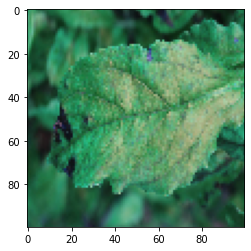

In [19]:
plt.imshow(train_data[0][0])

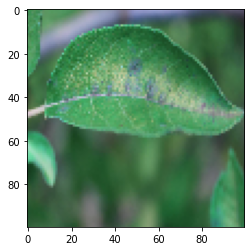

In [20]:
plt.imshow(train_data[1000][0])

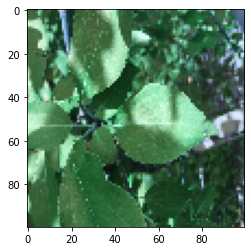

In [22]:
plt.imshow(train_data[400][0])

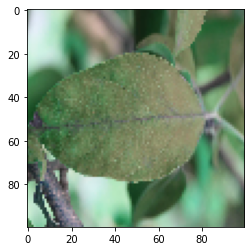

In [23]:
plt.imshow(train_data[40][0])

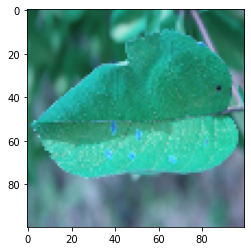

In [24]:
plt.imshow(train_data[1203][0])

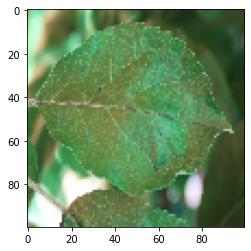

In [25]:
plt.imshow(train_data[10][0])

In [21]:
for img in os.listdir(DIRECTORY):
    img_path = os.path.join(DIRECTORY, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))

    if img.find('Test_') > -1:
        test_data.append(img_arr)

In [26]:
test_data[0]

array([[[ 73, 143, 112],
        [105, 177, 147],
        [ 77, 138, 125],
        ...,
        [ 96, 160, 119],
        [120, 189, 166],
        [136, 191, 164]],

       [[ 55, 122, 100],
        [ 19,  86,  65],
        [  6,  96,  75],
        ...,
        [109, 188, 149],
        [ 87, 174, 130],
        [ 83, 171, 129]],

       [[ 53, 108,  93],
        [  5,  74,  57],
        [  0, 101,  79],
        ...,
        [ 92, 184, 135],
        [101, 197, 163],
        [124, 199, 171]],

       ...,

       [[175, 228, 219],
        [  9,  28,  30],
        [ 10,  44,  37],
        ...,
        [ 50,  89,  71],
        [ 39,  95,  76],
        [ 34,  61,  50]],

       [[160, 215, 205],
        [  8,  24,  19],
        [  4,  24,  25],
        ...,
        [ 61, 118, 109],
        [ 61, 130, 115],
        [ 86, 169, 155]],

       [[157, 209, 199],
        [ 16,  29,  25],
        [  6,  28,  21],
        ...,
        [ 94, 142, 136],
        [ 72, 123, 116],
        [ 77, 138, 128]]

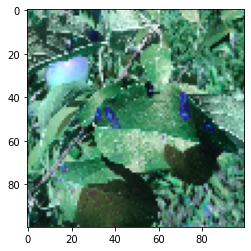

In [27]:
plt.imshow(test_data[0])

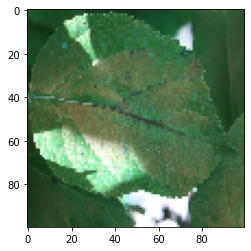

In [28]:
plt.imshow(test_data[20])

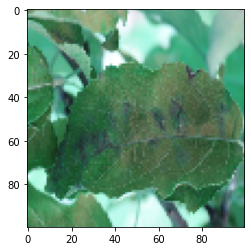

In [29]:
plt.imshow(test_data[567])

In [30]:
random.shuffle(train_data)

In [31]:
train_samples = []
train_labels = []

In [32]:
for features, labels in train_data:
    train_samples.append(features)
    train_labels.append(labels)

In [33]:
train_samples[0]

array([[[ 13,  36,  21],
        [ 12,  35,  20],
        [ 16,  40,  28],
        ...,
        [103, 123, 140],
        [104, 128, 146],
        [100, 126, 143]],

       [[ 11,  33,  21],
        [ 14,  37,  22],
        [ 21,  44,  30],
        ...,
        [102, 128, 144],
        [ 99, 126, 140],
        [ 93, 119, 135]],

       [[ 11,  34,  19],
        [ 19,  45,  29],
        [ 31,  88,  67],
        ...,
        [ 92, 121, 136],
        [ 86, 115, 121],
        [ 61,  97,  91]],

       ...,

       [[ 52, 133, 106],
        [ 55, 137, 108],
        [ 56, 135, 108],
        ...,
        [ 88, 133, 122],
        [ 25,  68,  47],
        [ 30,  79,  57]],

       [[ 47, 129, 100],
        [ 57, 139, 110],
        [ 64, 141, 113],
        ...,
        [ 92, 145, 142],
        [ 38,  73,  53],
        [ 26,  65,  43]],

       [[ 50, 126,  98],
        [ 63, 138, 110],
        [ 63, 140, 112],
        ...,
        [ 75, 143, 132],
        [ 48,  98,  81],
        [ 19,  50,  35]]

In [34]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [35]:
# save to continue later
pickle.dump(train_samples, open('train_samples.pkl', 'wb'))
pickle.dump(train_labels, open('train_labels.pkl', 'wb'))

In [ ]:
# load saved data
train_samples = pickle.load(open('train_samples.pkl', 'rb'))
train_labels = pickle.load(open('train_labels.pkl', 'rb'))